# Projeto Final | Sistema para Edição de imagens e áudios

<div style="background-color: #f2f2f2; text-align: center; padding: 10px;">
  <h3>Script para Análise dos arquivos de log</h3>
</div>

%------------------------------------------------------------------------------------------------------%<br>
<br>
``Autores:`` Andrea Elias, Anthony Heimlich, Éverton Donato, Julia Midori e Luana Kruger  <br>
<br>
``Instituição:`` ADA Tech<br>
<br>
``Projeto:`` Santander Coders 2023.2<br>
<br>
``Descrição:`` Este código implementa funções para analisar informações contidas nos arquivos de log<br>
<br>
``Repositório GitHub:``  <br>
<br>

%------------------------------------------------------------------------------------------------------%

## Carregar bibliotecas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Carregar Funções

### Carregar arquivo de log

In [14]:
def carregar_arquivo_log(path):
    return pd.read_csv(path)

### Tempo de processamento médio por tipo (imagem ou áudio)

In [3]:
def tempo_processamento_medio_por_tipo(df):
    return df.groupby('Tipo de Processamento')['Tempo de Processamento'].mean()

### Distribuição do tempo de processamento

In [25]:
def distribuicao_tempo_processamento(df):
    # plt.hist(df['Tempo de processamento'], bins=10, alpha=0.5, label='Imagem')
    # plt.legend(loc='upper right')
    # plt.xlabel('Tempo de Processamento')
    # plt.ylabel('Frequência')
    # plt.title('Distribuição do Tempo de Processamento')
    # plt.show()

    return df['Tempo de Processamento'].hist()

### Tempo médio de processamento por tipo de processamento

In [5]:
def tempo_medio_processamento_por_tipo(df):
    return df.groupby('Tipo de Processamento')['Tempo de Processamento'].mean()

### Arquivos com tempo de processamento abaixo da média

In [6]:
def arquivos_abaixo_da_media(df):
    media = df['Tempo de Processamento'].mean()
    return df[df['Tempo de Processamento'] < media]

### Comparação de desempenho entre tipos de processamento

In [7]:
def comparacao_desempenho_tipos(df):
    return df.groupby('Tipo de Processamento')['Tempo de Processamento'].mean().sort_values()

### Análise de correlação

In [9]:
def analise_correlacao(df):
    return df[['Tamanho do Arquivo', 'Tempo de Processamento']].corr()

### Análise de frequência por tipo de processamento

In [11]:
def analise_frequencia_tipo_processamento(df):
    return df['Tipo de Processamento'].value_counts()

### Análise de erros por tipo de processamento

In [12]:
def analise_erros_por_tipo(df):
    return df.groupby('Tipo de Processamento')['Mensagem de Erro'].value_counts()

## Exemplo de uso

In [15]:
path_image = '..\logs\log_image.csv'
path_audio = '..\logs\log_audio.csv'

# Carregar arquivo de log de imagem
df_imagem = carregar_arquivo_log(path_image)

# Carregar arquivo de log de áudio
# df_audio = carregar_arquivo_log(path_audio)

In [16]:
df_imagem

,Data e Hora,Tipo de Processamento,Tempo de Processamento,Nome do Arquivo,Tamanho do Arquivo,Resultado do Processamento,Mensagem de Erro
0,2024-03-08 18:32:33.238900,Carregamento de Imagem,0:00:00,image_test.png,12973,Sucesso,NaN
1,2024-03-08 18:32:33.301122,Mudança de Cor de Fundo,0:00:00.002334,image_test.png,12973,Sucesso,NaN
2,2024-03-08 18:32:33.362394,Rotação de Imagem,0:00:00.012962,image_test.png,12973,Sucesso,NaN
3,2024-03-08 18:32:33.406803,Inversão Horizontal,0:00:00,image_test.png,12973,Sucesso,NaN
4,2024-03-08 18:32:33.466135,Deslocamento de Imagem,0:00:00.008641,image_test.png,12973,Sucesso,NaN
5,2024-03-08 18:32:33.507049,Zoom de Imagem,0:00:00.003115,image_test.png,12973,Sucesso,NaN


AxesSubplot(0.125,0.11;0.775x0.77)


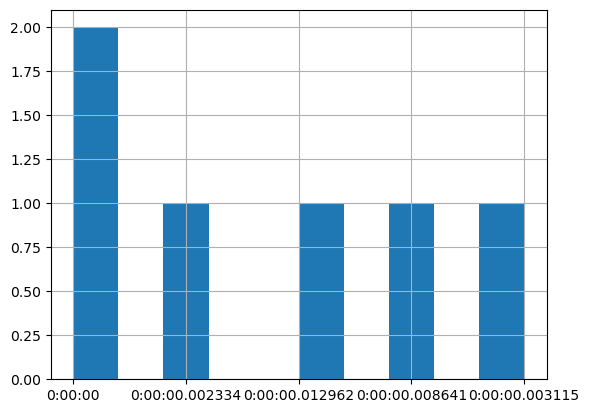

In [26]:
print(distribuicao_tempo_processamento(df_imagem))
# print(distribuicao_tempo_processamento(df_audio))

In [27]:
print(tempo_processamento_medio_por_tipo(df_imagem))
# print(tempo_processamento_medio_por_tipo(df_audio))

TypeError: Could not convert 0:00:00 to numeric